In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
df['duration'].min()

0.83

In [12]:
df['duration'].max()

49.83

In [13]:
df['duration'].median()

11.25

## Preprocessing
Making all the data numerical or binary

In [14]:
# Drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)
df['class']=df['class'].apply(lambda x: 1 if x == 'Business' else 0) #Binary transformation

In [37]:
# Factorization of categorical data
df.stops = pd.factorize(df.stops)[0]

In [16]:
# One-hot encoding
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop('airline',axis= 1)
df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype=int)).drop('source_city',axis= 1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest', dtype=int)).drop('destination_city',axis= 1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype=int)).drop('arrival_time',axis= 1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype=int)).drop('departure_time',axis= 1)

In [17]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [21]:
reg.score(X_test, y_test)

0.9853028172768822

In [22]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9853028172768822
MAE: 1070.8628981450854
MSE: 7621868.153948275
RMSE: 2760.7731080167155


Text(0.5, 1.0, 'Prediction VS Actual Price')

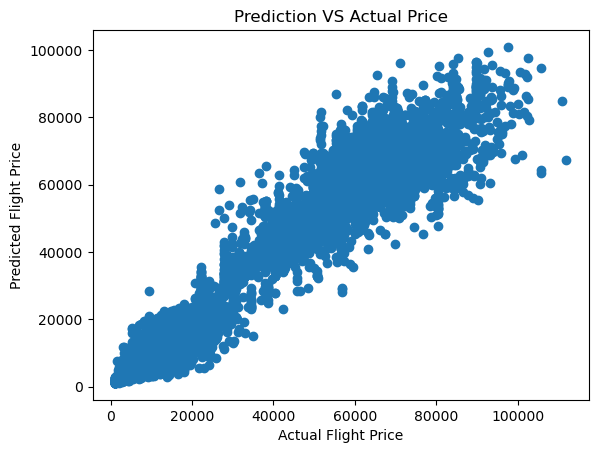

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [24]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [25]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8794516514466914),
 ('duration', 0.057982779231417),
 ('days_left', 0.01857113568138786),
 ('airline_Air_India', 0.0053065948977156045),
 ('airline_Vistara', 0.00459101276912457),
 ('source_Delhi', 0.003556519099431245),
 ('dest_Delhi', 0.0033331397130363454),
 ('source_Mumbai', 0.002188061027061819),
 ('dest_Kolkata', 0.0018948847800069816),
 ('dest_Mumbai', 0.001879396926125015),
 ('stops', 0.0018741518618465868),
 ('source_Kolkata', 0.0017760857998987017),
 ('arrival_Evening', 0.0016442326679644865),
 ('dest_Hyderabad', 0.0014811343528958274),
 ('dest_Bangalore', 0.0013174041793006855),
 ('source_Hyderabad', 0.001307626919201968),
 ('departure_Evening', 0.0011434970349318322),
 ('source_Bangalore', 0.001128760181408079),
 ('arrival_Night', 0.001119466669011137),
 ('arrival_Afternoon', 0.0009836330226328817),
 ('source_Chennai', 0.0009472437892322769),
 ('dest_Chennai', 0.0008938884864084139),
 ('departure_Morning', 0.0008553445635978337),
 ('departure_Afternoon', 0.0008

<BarContainer object of 10 artists>

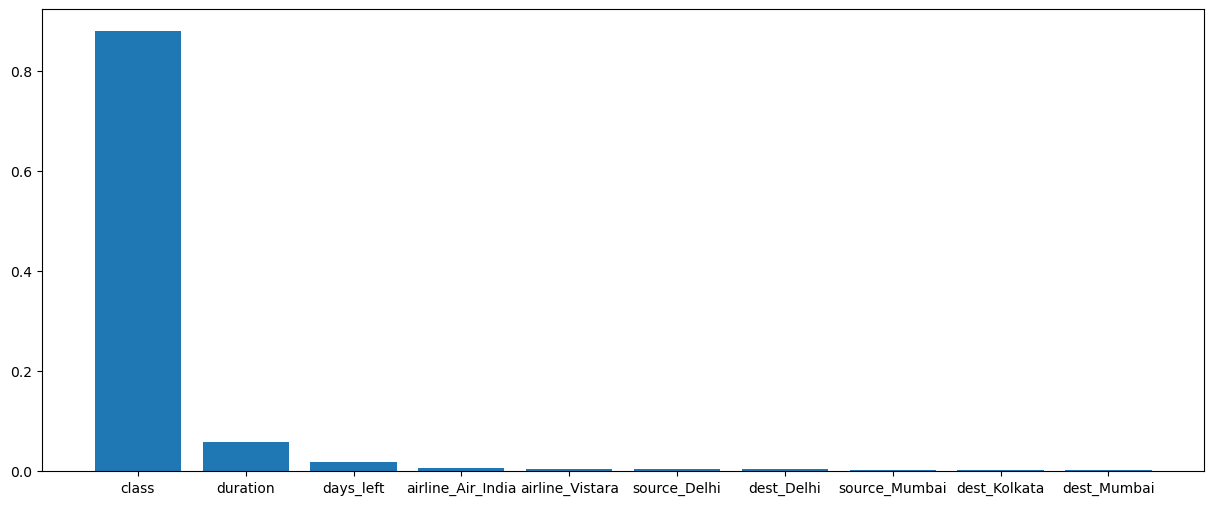

In [26]:
plt.figure(figsize=(15, 6)) 
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])


## Hyperparameter Tuning

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, 
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   8.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   9.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   9.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  17.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  17.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  13.9s


In [33]:
best_regressor.score(X_test, y_test)

0.9849078707527195

In [35]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9849078707527195
MAE: 1319.7837057487075
MSE: 7826684.98120955
RMSE: 2797.62130768436


Text(0.5, 1.0, 'Prediction VS Actual Price')

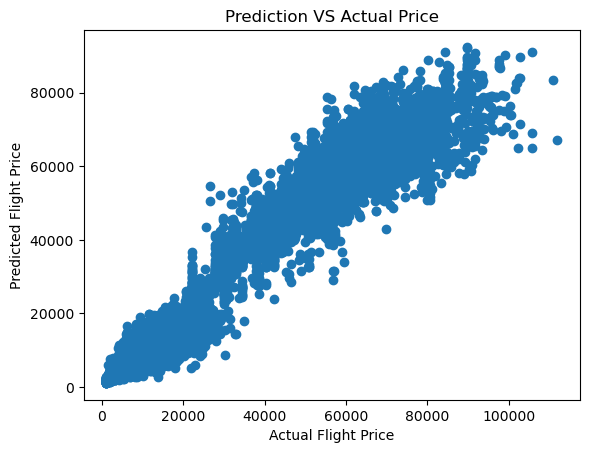

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

## Conclusion

The Random Forest Regressor model achieved an impressive R² score of 0.985, explaining 98.49% of the variance in flight prices. However, the Mean Absolute Error (MAE) was $1319.78, indicating some room for improvement in accuracy.

We performed hyperparameter tuning using RandomizedSearchCV, which slightly improved the model, but the performance remained similar with a R² of 0.9849. The tuning did not drastically reduce the errors, suggesting the model was already near its optimal form.